In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler as MMS
import re
import random

In [2]:
sheet_1 = pd.read_excel("C:\\Users\\KARAN\\Desktop\\diet project\\diet data base.xlsx",sheet_name='Sheet1')
sheet_2=pd.read_excel("C:\\Users\\KARAN\\Desktop\\diet project\\diet data base.xlsx",sheet_name='Sheet2')

In [3]:
sheet_1.head()

,Patient No.,patient_age,patient_gender,department,final_diagnosis,presentation_history,past_medical_history,drug_allergy,on_examination_dis,Unnamed: 9,...,dignosis,calories,cho,Fat,pro,cabs,fluids,NA,K.1,Si no.
0,A1,64Years,Female,Surgical Gastroenterology,ACUTE CALCULUS CHOLECYSTITIS\n DIABETES MELLIT...,64 years old female presented with the complai...,Known case of Diabetic and CAD on regular medi...,Allergic to Sulpha and salbutamol,"Patient conscious, oriented, alert and afebril...",NaN,...,NaN,1800,246,30,60,NaN,3,7,NaN,d001
1,A2,67Years,Female,Anaesthesiology,- RIGHT TRIGEMINAL NEURALAGIA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d002
2,A3,19Years,Male,Neuro And Spinal Surgery,- HEAD INJURY WITH ANTERIOR SKULL BASE FRACTURE,"Mr. Kabilesh 19 years old male, presented with...",NaN,- Nil,"Patient conscious, oriented, afebrile\n PR - 7...",CT Brain on 08/06/2019\n - Extra axial pneumoc...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A4,60Years,Male,Nephrology,TYPE 2 DIABETES MELLITUS\n SYSTEMIC HYPERTENSI...,"Mr. Thiyagarajan. V, 60 year old male presente...",Known Case of Type 2 Diabetes Mellitus / Syste...,Not Known Drug Allergy,"Patient conscious, oriented, afebrile\n PR – 9...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A5,49Years,Male,Nephrology,DIABETIC NEPHROPATHY\n HYPERTENSION\n CHRONIC ...,"Mr. Venugopal. T, 49 year old male presented w...",NaN,Nil,"Patient conscious, oriented, afebrile\n Edema ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
sheet_2.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,NON-VEG DIET,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,D051,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,NaN,D051,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Morning Tea,Milk / Tea / Coffee,Milk / Tea / Coffee,Milk / Tea / Coffee,Milk / Tea / Coffee,Milk / Tea / Coffee,Milk / Tea / Coffee,Milk / Tea / Coffee,NaN,Morning Tea,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Breakfast,Idli - 2 Nos. +sambar or Pulka 2 Nos. With Dhall,Rava kitchadi+pudina chutney/phulka + veg sabji,Kal dosa + onion chutney/Veg poha,Pongal + Sambar/Beesan cheela,Idli - 2 Nos. +sambar or Pulka 2 Nos. With Dhall,Rava kitchadi+pudina chutney/phulka + veg sabji,Appam + veg gravy/Tomato omlet,NaN,Breakfast,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mid Morning,Butter milk/Masala chass,Veg clear soup,Cucumber Salad,Lemon juice,Papaya 100 gms,Tomato soup,stewed apple,NaN,Mid Morning,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Lunch,"Double cooked Rice - 1/2 cup,brinjalsambar,low...","Double cooked Rice - 1/2cup,drumstick sambar+p...","Double cooked Rice- 1/2 cup,moore kulambu+pota...","Double cooked Rice - 1/2cup,Spice less vatha k...","Double cookedRice - 1/2 cup,Small onion sambar...",Curd rice + snake guard kootu/Snake guard sabji,"Double cooked Rice - 1/2cup,Spice less vatha k...",NaN,Lunch,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(sheet_1.shape)
print(sheet_2.shape)

(384, 35)
(3350, 36)


In [6]:
sheet_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient No.             384 non-null    object 
 1   patient_age             384 non-null    object 
 2   patient_gender          384 non-null    object 
 3   department              382 non-null    object 
 4   final_diagnosis         331 non-null    object 
 5   presentation_history    290 non-null    object 
 6   past_medical_history    54 non-null     object 
 7   drug_allergy            288 non-null    object 
 8   on_examination_dis      341 non-null    object 
 9   Unnamed: 9              311 non-null    object 
 10  course_in_the_hospital  356 non-null    object 
 11  condition_at_discharge  299 non-null    object 
 12  discharge_medication    281 non-null    object 
 13  diet_advice             274 non-null    object 
 14  Ht                      366 non-null    ob

In [7]:
sheet_1.describe()

,HB,UREA,CR,Na,K,FBS,HBA1C,SGOT,SGPT,dignosis,cabs,K.1
count,152.000000,133.000000,143.000000,136.000000,142.000000,10.000000,33.000000,89.000000,89.000000,0.0,0.0,0.0
mean,11.169474,42.753383,1.745944,134.882353,4.098239,125.400000,8.536364,39.692135,38.542697,NaN,NaN,NaN
std,2.441120,49.991111,2.949934,5.391432,0.632009,61.208569,2.654574,67.690659,46.127439,NaN,NaN,NaN
min,5.640000,7.600000,0.470000,116.000000,2.400000,83.000000,4.800000,7.500000,6.700000,NaN,NaN,NaN
25%,9.200000,20.200000,0.740000,132.000000,3.700000,90.500000,6.200000,16.000000,15.500000,NaN,NaN,NaN
50%,11.150000,27.500000,0.900000,135.000000,4.100000,102.500000,8.300000,22.800000,24.400000,NaN,NaN,NaN
75%,12.900000,41.000000,1.315000,138.000000,4.400000,118.250000,10.100000,34.000000,41.900000,NaN,NaN,NaN
max,17.700000,449.000000,22.050000,157.000000,6.700000,276.000000,14.600000,469.100000,315.000000,NaN,NaN,NaN


In [8]:
sheet_1.isnull().sum()

Patient No.                 0
patient_age                 0
patient_gender              0
department                  2
final_diagnosis            53
presentation_history       94
past_medical_history      330
drug_allergy               96
on_examination_dis         43
Unnamed: 9                 73
course_in_the_hospital     28
condition_at_discharge     85
discharge_medication      103
diet_advice               110
Ht                         18
Wt                         15
HB                        232
UREA                      251
CR                        241
Na                        248
K                         242
FBS                       374
HBA1C                     351
SGOT                      295
SGPT                      295
dignosis                  384
calories                   49
cho                        54
Fat                        54
pro                        51
cabs                      384
fluids                     51
NA                         51
K.1       

In [9]:
for i in range(len(sheet_1['patient_age'])):
    try:
        y=sheet_1['patient_age'][i].index('Y')
        sheet_1.loc[i,'patient_age'] =int(sheet_1['patient_age'][i][:y])
    except:
        y=sheet_1['patient_age'][i].index('D')
        sheet_1.loc[i,'patient_age'] =int(sheet_1['patient_age'][i][:y])/365


In [10]:
sheet_1.head()

,Patient No.,patient_age,patient_gender,department,final_diagnosis,presentation_history,past_medical_history,drug_allergy,on_examination_dis,Unnamed: 9,...,dignosis,calories,cho,Fat,pro,cabs,fluids,NA,K.1,Si no.
0,A1,64,Female,Surgical Gastroenterology,ACUTE CALCULUS CHOLECYSTITIS\n DIABETES MELLIT...,64 years old female presented with the complai...,Known case of Diabetic and CAD on regular medi...,Allergic to Sulpha and salbutamol,"Patient conscious, oriented, alert and afebril...",NaN,...,NaN,1800,246,30,60,NaN,3,7,NaN,d001
1,A2,67,Female,Anaesthesiology,- RIGHT TRIGEMINAL NEURALAGIA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d002
2,A3,19,Male,Neuro And Spinal Surgery,- HEAD INJURY WITH ANTERIOR SKULL BASE FRACTURE,"Mr. Kabilesh 19 years old male, presented with...",NaN,- Nil,"Patient conscious, oriented, afebrile\n PR - 7...",CT Brain on 08/06/2019\n - Extra axial pneumoc...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A4,60,Male,Nephrology,TYPE 2 DIABETES MELLITUS\n SYSTEMIC HYPERTENSI...,"Mr. Thiyagarajan. V, 60 year old male presente...",Known Case of Type 2 Diabetes Mellitus / Syste...,Not Known Drug Allergy,"Patient conscious, oriented, afebrile\n PR – 9...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A5,49,Male,Nephrology,DIABETIC NEPHROPATHY\n HYPERTENSION\n CHRONIC ...,"Mr. Venugopal. T, 49 year old male presented w...",NaN,Nil,"Patient conscious, oriented, afebrile\n Edema ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
sheet_1['patient_age'] = pd.to_numeric(sheet_1['patient_age'])


In [12]:
sheet_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient No.             384 non-null    object 
 1   patient_age             384 non-null    float64
 2   patient_gender          384 non-null    object 
 3   department              382 non-null    object 
 4   final_diagnosis         331 non-null    object 
 5   presentation_history    290 non-null    object 
 6   past_medical_history    54 non-null     object 
 7   drug_allergy            288 non-null    object 
 8   on_examination_dis      341 non-null    object 
 9   Unnamed: 9              311 non-null    object 
 10  course_in_the_hospital  356 non-null    object 
 11  condition_at_discharge  299 non-null    object 
 12  discharge_medication    281 non-null    object 
 13  diet_advice             274 non-null    object 
 14  Ht                      366 non-null    ob

In [13]:
sheet_1.columns

Index(['Patient No.', 'patient_age', 'patient_gender', 'department',
       'final_diagnosis', 'presentation_history', 'past_medical_history',
       'drug_allergy', 'on_examination_dis', 'Unnamed: 9',
       'course_in_the_hospital', 'condition_at_discharge',
       'discharge_medication', 'diet_advice', 'Ht', 'Wt', 'HB', 'UREA', 'CR',
       'Na', 'K', 'FBS', 'HBA1C', 'SGOT', 'SGPT', 'dignosis', 'calories',
       'cho', 'Fat', 'pro', 'cabs', 'fluids', 'NA', 'K.1', 'Si no.'],
      dtype='object')

In [14]:

sheet_1=sheet_1.drop(axis=1,labels=['Patient No.','department', 'final_diagnosis',
       'presentation_history', 'past_medical_history', 'drug_allergy',
       'on_examination_dis', 'Unnamed: 9', 'course_in_the_hospital',
       'condition_at_discharge', 'discharge_medication','Si no.','K.1','dignosis','cabs'])

In [15]:
sheet_1.shape

(384, 20)

In [16]:
sheet_1.head()

,patient_age,patient_gender,diet_advice,Ht,Wt,HB,UREA,CR,Na,K,FBS,HBA1C,SGOT,SGPT,calories,cho,Fat,pro,fluids,NA
0,64.0,Female,Normal diabetic diet.\n PLEASE COME TO EMERGEN...,155,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1800,246,30,60,3,7
1,67.0,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19.0,Male,- Normal diet,N,N,9.60,24.1,0.79,136.0,4.0,NaN,NaN,17.5,15.5,NaN,NaN,NaN,NaN,NaN,NaN
3,60.0,Male,"Salt free, 750ml fluid, low potassium, diabeti...",N,N,9.33,128.0,2.08,131.0,3.8,NaN,NaN,39.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN
4,49.0,Male,"Salt free, 750 ml fluid, low potassium diabeti...",177,86.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
sheet_1.columns[sheet_1.isnull().any(axis=0)]

Index(['diet_advice', 'Ht', 'Wt', 'HB', 'UREA', 'CR', 'Na', 'K', 'FBS',
       'HBA1C', 'SGOT', 'SGPT', 'calories', 'cho', 'Fat', 'pro', 'fluids',
       'NA'],
      dtype='object')

In [18]:
sheet_1['patient_gender'].replace(to_replace="Female",value=0,inplace=True)
sheet_1['patient_gender'].replace(to_replace="Male",value=1,inplace=True)
sheet_1.replace(to_replace='N',value="NaN",inplace=True)

In [19]:
sheet_1['Ht'].replace(to_replace="160cms",value=160,inplace=True)
sheet_1['Ht'].replace(to_replace="165cms",value=165,inplace=True)
sheet_1['Wt'].replace(to_replace=['65kg','74kg'],value=[65,74],inplace=True)
sheet_1.replace(to_replace='-',value="NaN",inplace=True)

In [20]:

for i in range(len(sheet_1['diet_advice'])):
    try:
        if 'diabetic' in sheet_1.loc[i,'diet_advice'].lower() and (str(sheet_1.loc[i,'HBA1C'])=='nan' or str(sheet_1.loc[i,'HBA1C'])=='NaN'):
            sheet_1.loc[i,'HBA1C']=round(random.uniform(6.00,12.00),2)
        elif 'diabetic' not in sheet_1.loc[i,'diet_advice'].lower() and (str(sheet_1.loc[i,'HBA1C'])=='nan' or str(sheet_1.loc[i,'HBA1C'])=='NaN'):
            sheet_1.loc[i,'HBA1C']=round(random.uniform(4.60,5.99),2)
    except:
        pass

In [21]:
for i in range(len(sheet_1['patient_gender'])):
    if(sheet_1['patient_gender'][i]==1 and (str(sheet_1.loc[i,'HB'])=='NaN' or str(sheet_1.loc[i,'HB'])=='nan')):
        sheet_1.loc[i,'HB']=round(random.uniform(13.20,16.60),2)
    elif(sheet_1['patient_gender'][i]==0 and (str(sheet_1.loc[i,'HB'])=='NaN' or str(sheet_1.loc[i,'HB'])=='nan')):
        sheet_1.loc[i,'HB']=round(random.uniform(11.60,15.00),2)


In [22]:

for i in range(len(sheet_1['UREA'])):
        if( str(sheet_1.loc[i,'UREA'])=='NaN' or str(sheet_1.loc[i,'UREA'])=='nan' ):
            sheet_1.loc[i,'UREA']=round(random.uniform(105,108),2)
        


In [23]:
for i in range(len(sheet_1['patient_gender'])):
    if(sheet_1['patient_gender'][i]==1 and (str(sheet_1.loc[i,'CR'])=='NaN' or str(sheet_1.loc[i,'CR'])=='nan')):
        sheet_1.loc[i,'CR']=round(random.uniform(0.85,0.90),2)
    elif(sheet_1['patient_gender'][i]==0 and (str(sheet_1.loc[i,'CR'])=='NaN' or str(sheet_1.loc[i,'CR'])=='nan')):
        sheet_1.loc[i,'CR']=round(random.uniform(0.90,1.00),2)


In [24]:
sheet_1['FBS'].fillna(sheet_1['FBS'].mode()[0],inplace=True)

In [25]:
sheet_1.isnull().sum()

patient_age         0
patient_gender      0
diet_advice       110
Ht                 18
Wt                 15
HB                  0
UREA                0
CR                  0
Na                248
K                 242
FBS                 0
HBA1C             106
SGOT              295
SGPT              295
calories           49
cho                54
Fat                54
pro                51
fluids             51
NA                 51
dtype: int64

In [26]:
sheet_1.drop(labels='diet_advice',inplace=True,axis=1)

In [27]:
sheet_1.columns[:13]

Index(['patient_age', 'patient_gender', 'Ht', 'Wt', 'HB', 'UREA', 'CR', 'Na',
       'K', 'FBS', 'HBA1C', 'SGOT', 'SGPT'],
      dtype='object')

In [28]:
for i in sheet_1.columns[:13]:   
    sheet_1[i].fillna(round(sheet_1[i].median(),2),inplace=True)
    sheet_1[i].replace(to_replace='NaN',value=round(sheet_1[i].median(),2),inplace=True)


In [29]:
sheet_1.loc[10,'SGOT']=sheet_1.loc[10,'SGOT']/10
sheet_1.loc[10,'SGPT']=sheet_1.loc[10,'SGPT']/10
sheet_1.loc[219,'SGOT']=sheet_1.loc[219,'SGOT']/10
sheet_1.loc[219,'SGPT']=sheet_1.loc[219,'SGPT']/10
sheet_1.loc[314,'SGPT']=sheet_1.loc[314,'SGPT']/10
sheet_1.loc[16,'UREA']=sheet_1.loc[16,'UREA']/10
sheet_1.drop(axis=0,labels=318,inplace=True)
sheet_1.reset_index(drop=True,inplace=True)



In [30]:
sheet_1.isnull().sum()

patient_age        0
patient_gender     0
Ht                 0
Wt                 0
HB                 0
UREA               0
CR                 0
Na                 0
K                  0
FBS                0
HBA1C              0
SGOT               0
SGPT               0
calories          49
cho               53
Fat               53
pro               50
fluids            50
NA                50
dtype: int64

In [31]:
pd.DataFrame.to_csv(sheet_1,"Processed_with_null_in_predict.csv")

In [32]:
sheet_1.fillna(sheet_1.median(),inplace=True)
sheet_1.replace(to_replace='NaN',value=sheet_1.median(),inplace=True)

C:\Users\KARAN\AppData\Local\Temp\ipykernel_13936\1955085999.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sheet_1.fillna(sheet_1.median(),inplace=True)
C:\Users\KARAN\AppData\Local\Temp\ipykernel_13936\1955085999.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sheet_1.replace(to_replace='NaN',value=sheet_1.median(),inplace=True)


In [33]:
#sheet_1.dropna(axis=0,inplace=True)
#sheet_1.reset_index(drop=True,inplace=True)

In [34]:
sheet_1.shape

(383, 19)

In [35]:
sheet_1.median()

C:\Users\KARAN\AppData\Local\Temp\ipykernel_13936\677982406.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sheet_1.median()


patient_age         57.00
patient_gender       1.00
Ht                 160.00
Wt                  68.00
HB                  13.52
UREA               105.77
CR                   0.89
Na                 135.00
K                    4.10
FBS                 83.00
HBA1C                5.76
SGOT                22.80
SGPT                24.40
calories          1612.50
cho                221.00
Fat                 26.80
dtype: float64

In [36]:
sheet_1.head()

,patient_age,patient_gender,Ht,Wt,HB,UREA,CR,Na,K,FBS,HBA1C,SGOT,SGPT,calories,cho,Fat,pro,fluids,NA
0,64.0,0,155.0,60.0,14.40,105.05,0.97,135.0,4.1,83.0,10.55,22.8,24.4,1800.0,246.0,30.0,60,3,7
1,67.0,0,160.0,68.0,14.39,107.86,0.99,135.0,4.1,83.0,5.76,22.8,24.4,1612.5,221.0,26.8,NaN,NaN,NaN
2,19.0,1,160.0,68.0,9.60,24.10,0.79,136.0,4.0,83.0,4.65,17.5,15.5,1612.5,221.0,26.8,NaN,NaN,NaN
3,60.0,1,160.0,68.0,9.33,128.00,2.08,131.0,3.8,83.0,10.73,39.0,55.0,1612.5,221.0,26.8,NaN,NaN,NaN
4,49.0,1,177.0,86.8,14.64,106.17,0.89,135.0,4.1,83.0,9.97,22.8,24.4,1612.5,221.0,26.8,NaN,NaN,NaN


In [37]:
sheet_1.describe()


,patient_age,patient_gender,Ht,Wt,HB,UREA,CR,Na,K,FBS,HBA1C,SGOT,SGPT,calories,cho,Fat
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,53.919060,0.605744,159.172063,66.500731,13.008251,83.301436,1.219504,134.958225,4.099347,84.107050,6.546449,24.591410,26.332898,1653.941253,233.244125,27.163185
std,19.364815,0.489329,8.324161,10.749846,2.343687,37.976112,1.844327,3.205579,0.383975,11.580202,1.975377,12.108273,13.980883,234.789590,103.901565,3.527265
min,1.000000,0.000000,100.000000,13.000000,5.640000,7.600000,0.470000,116.000000,2.400000,83.000000,4.610000,7.500000,2.440000,150.000000,164.000000,2.500000
25%,40.000000,0.000000,156.000000,63.000000,11.900000,37.650000,0.860000,135.000000,4.100000,83.000000,5.495000,22.800000,24.400000,1540.000000,211.500000,25.000000
50%,57.000000,1.000000,160.000000,68.000000,13.520000,105.770000,0.890000,135.000000,4.100000,83.000000,5.760000,22.800000,24.400000,1612.500000,221.000000,26.800000
75%,68.000000,1.000000,163.000000,71.000000,14.620000,107.040000,0.970000,135.000000,4.100000,83.000000,6.845000,22.800000,24.400000,1780.000000,243.500000,29.000000
max,94.000000,1.000000,180.000000,98.500000,17.700000,206.000000,22.050000,157.000000,6.700000,276.000000,14.600000,134.800000,170.000000,2500.000000,2180.000000,42.000000


In [38]:
sheet_1.loc[sheet_1.patient_age<1]

,patient_age,patient_gender,Ht,Wt,HB,UREA,CR,Na,K,FBS,HBA1C,SGOT,SGPT,calories,cho,Fat,pro,fluids,NA


In [39]:
sheet_1.isnull().sum()

patient_age        0
patient_gender     0
Ht                 0
Wt                 0
HB                 0
UREA               0
CR                 0
Na                 0
K                  0
FBS                0
HBA1C              0
SGOT               0
SGPT               0
calories           0
cho                0
Fat                0
pro               50
fluids            50
NA                50
dtype: int64

In [40]:
sheet_1.dropna(axis=0,inplace=True)
sheet_1.reset_index(drop=True,inplace=True)

In [41]:
sheet_1.isnull().sum()

patient_age       0
patient_gender    0
Ht                0
Wt                0
HB                0
UREA              0
CR                0
Na                0
K                 0
FBS               0
HBA1C             0
SGOT              0
SGPT              0
calories          0
cho               0
Fat               0
pro               0
fluids            0
NA                0
dtype: int64

In [42]:
sheet_1.shape

(333, 19)

In [43]:
#pd.DataFrame.to_csv(sheet_1,'train_data_329x19.csv')

In [44]:
#pd.DataFrame.to_csv(sheet_1,'processed_383x19.csv')

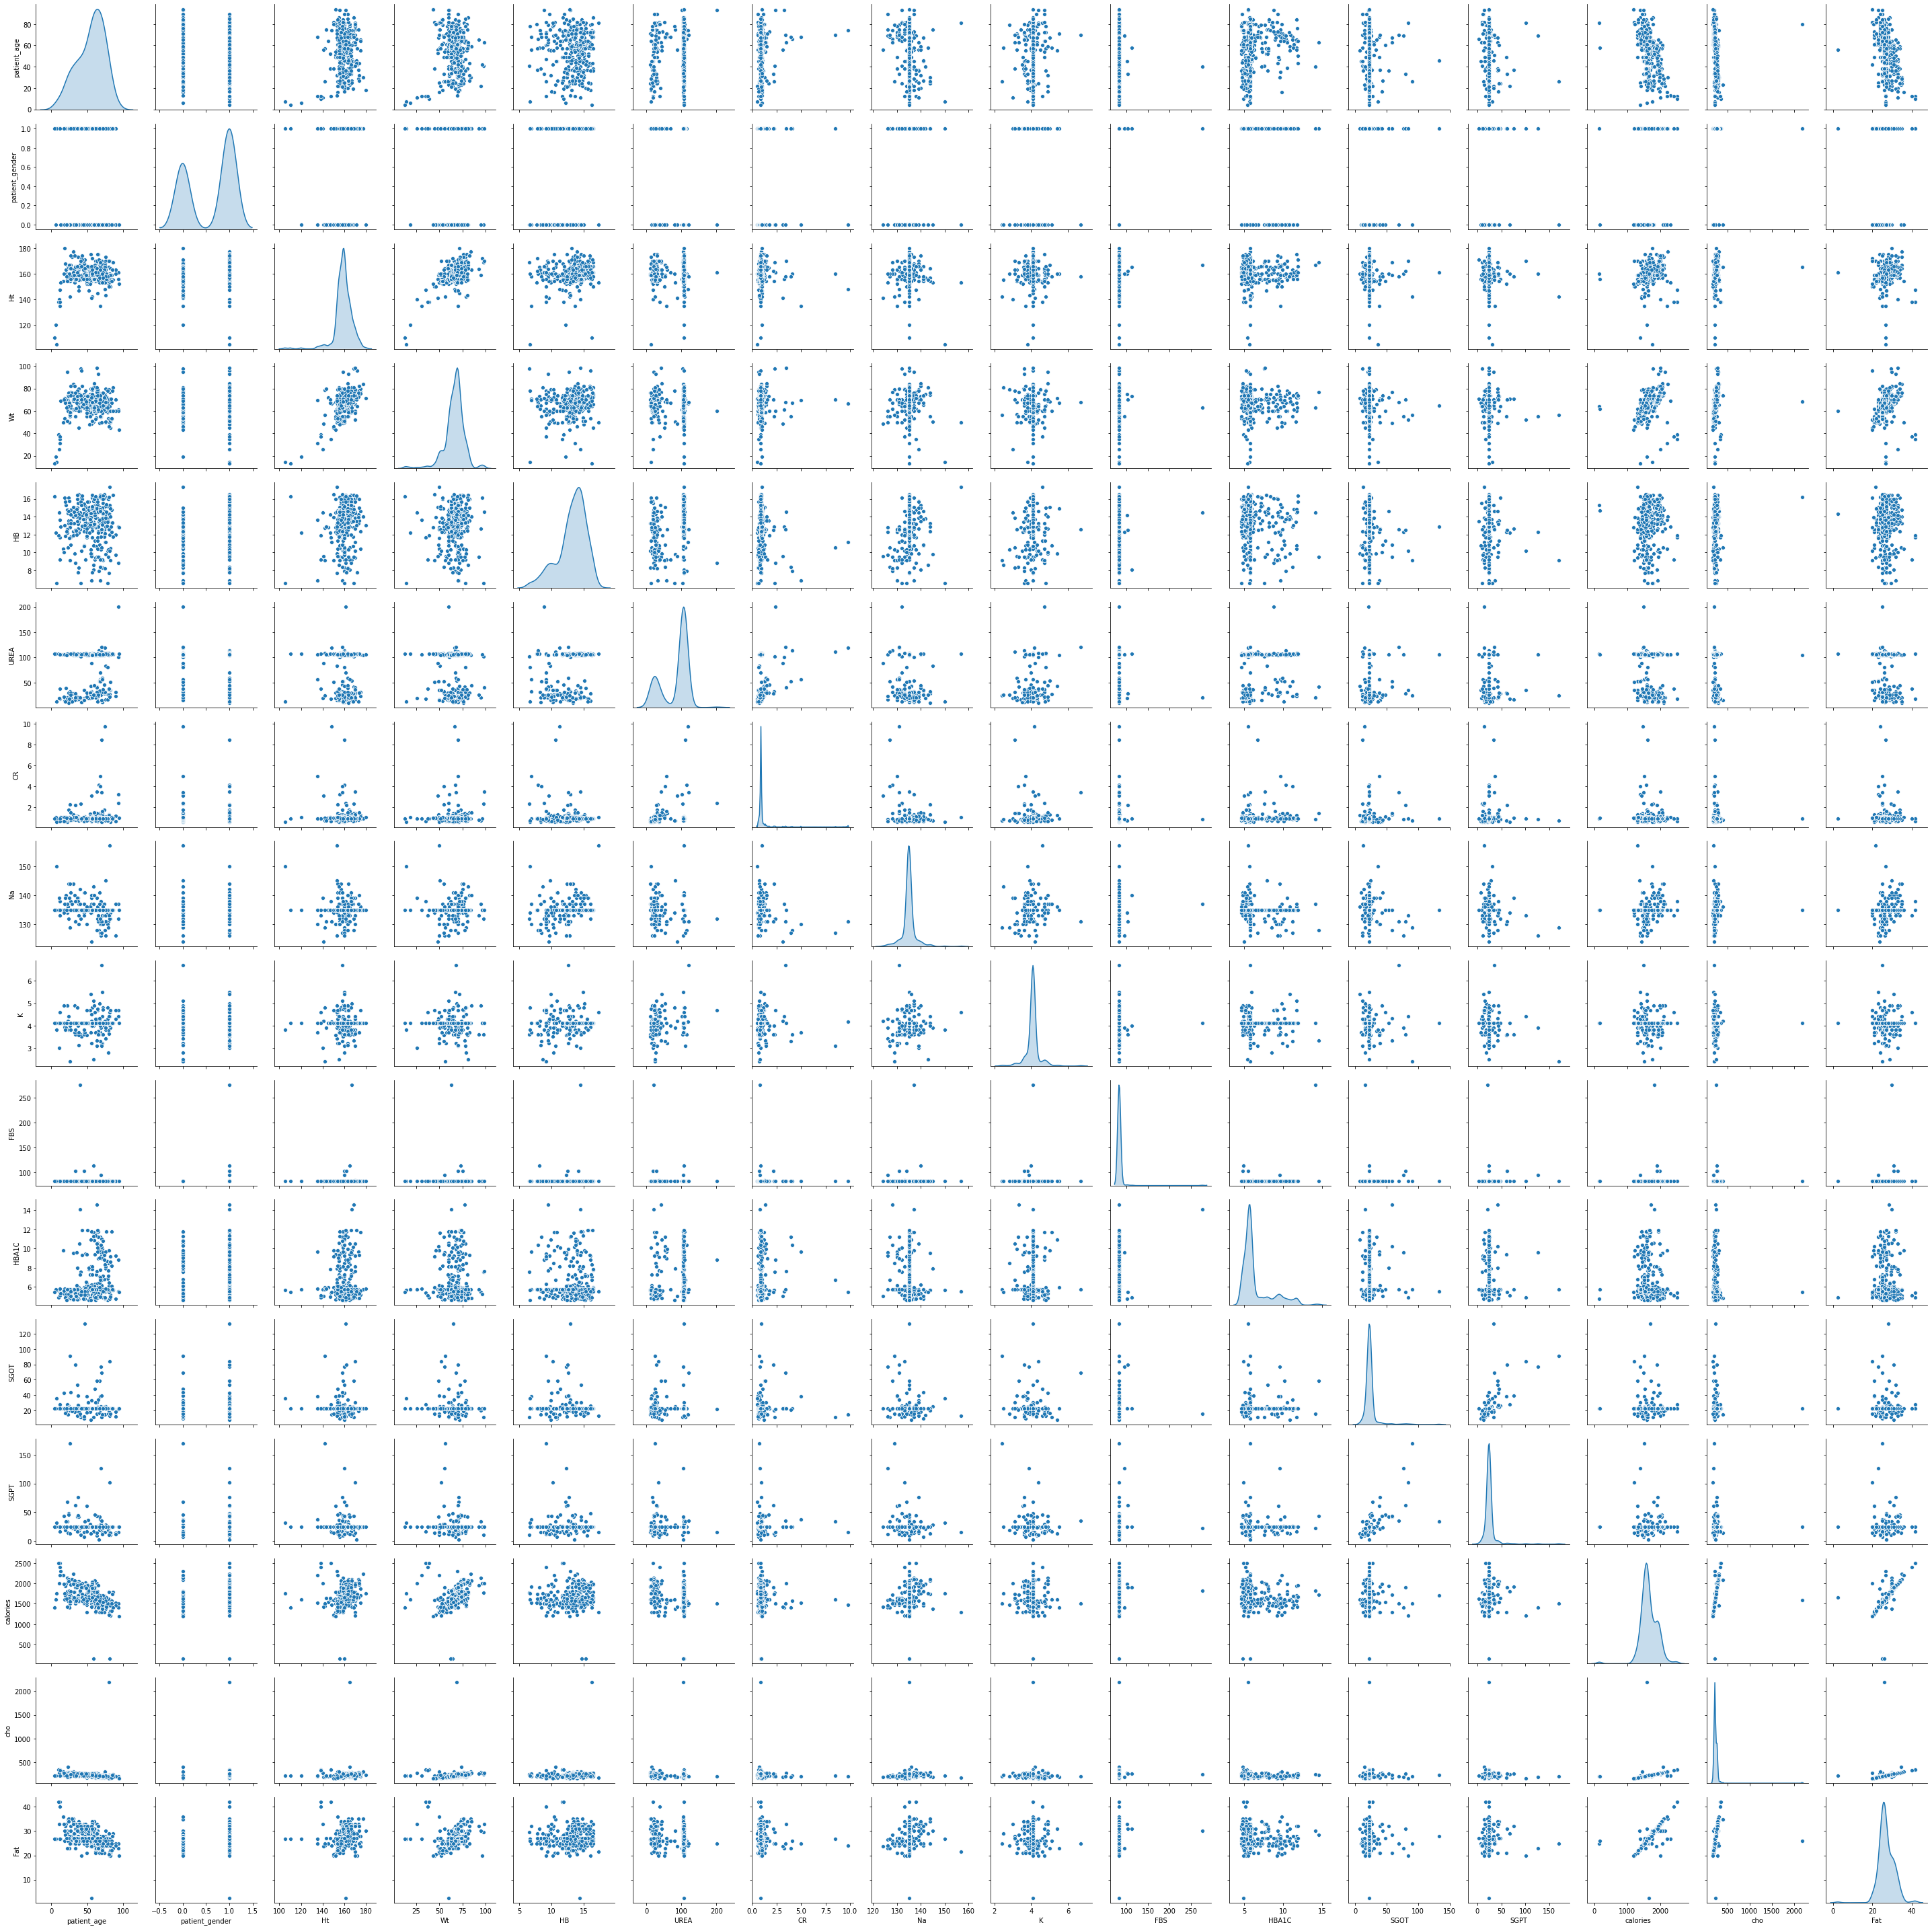

In [45]:
sns.pairplot(data=sheet_1, diag_kind='kde')

<AxesSubplot:xlabel='calories', ylabel='count'>

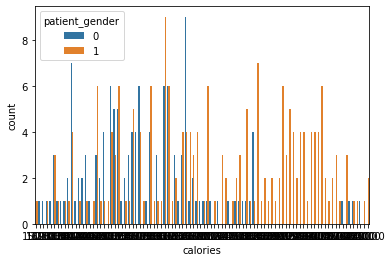

In [46]:
sns.countplot(data=sheet_1,x="calories",hue="patient_gender")

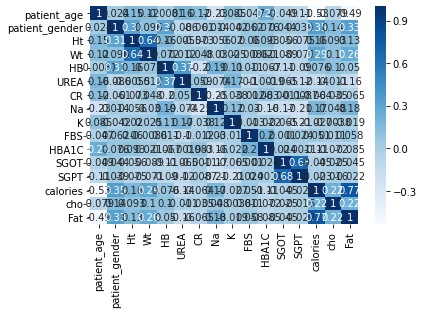

: 

In [47]:
sns.heatmap(sheet_1[["patient_age","patient_gender","Ht","Wt","HB",	"UREA","CR","Na","K","FBS","HBA1C","SGOT","SGPT","calories","cho","Fat"]].corr(), cmap='Blues', annot=True)
plt.show()

Fat& Calories | Ht & Wt have corelation 